In [3]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [4]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

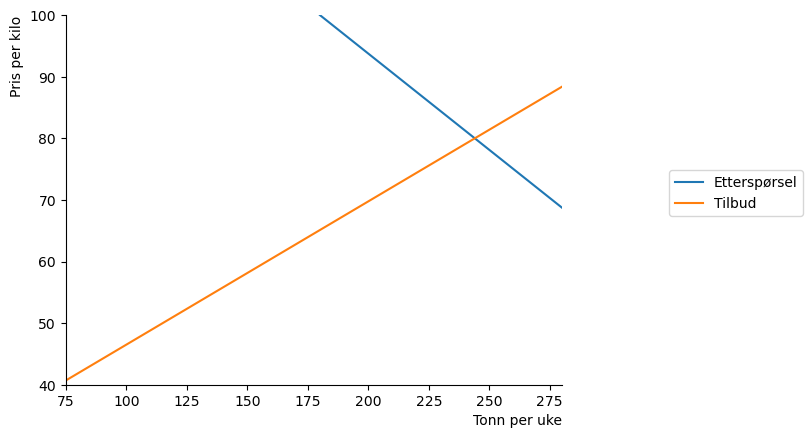

In [5]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

Text(0.5, 1.0, 'Tilbud med 25% mva')

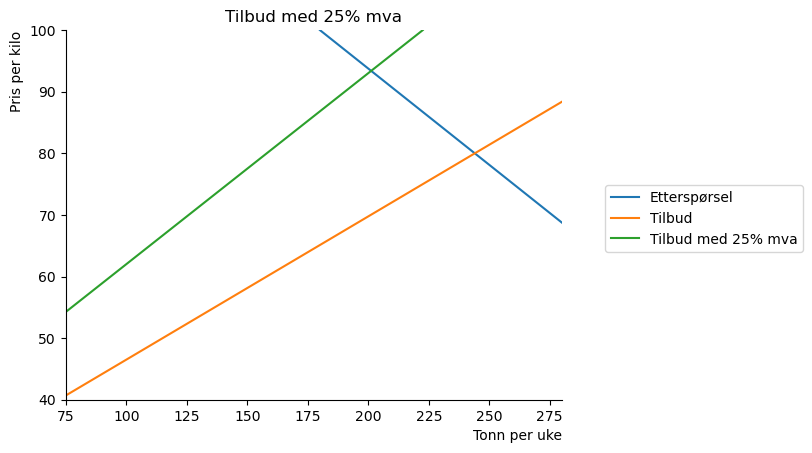

In [6]:
#oppgave 1
import matplotlib.patches as patches
#lager plott
fig, ax = create_ax()

#setter inn verdier
ax.plot(x_d(p_num),p_num, label='Etterspørsel') 
ax.plot(x_s(p_num, 0),p_num, label='Tilbud') 
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')
ax.legend(bbox_to_anchor=(1.5,0.6)); 
ax.set_title('Tilbud med 25% mva')

In [ ]:
her ser vi at tilbudsfunksjonen 25%mva er den originale tilbudsfunksjonen. Hvorfor den har mere stigning er resultat av en bedrift som øker en inntekt som fører til at de selges mindre produkter får å dekke kostnader.

Text(0.5, 1.0, 'Likevekt med merverdiavgift')

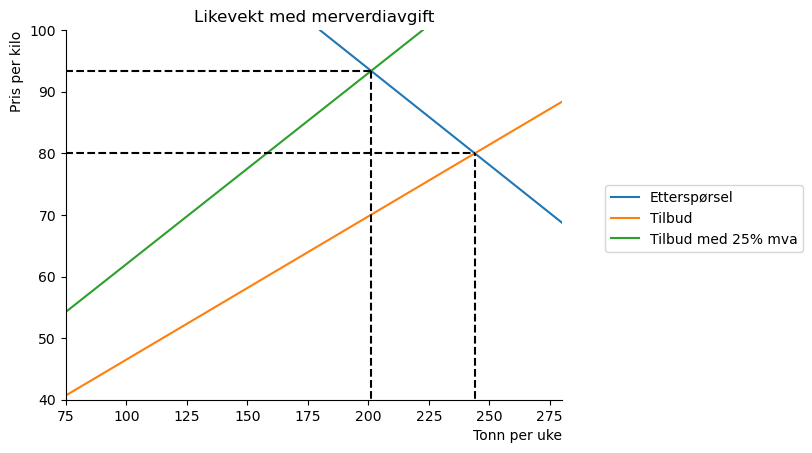

In [7]:
#Oppgave 2
x,p=sp.symbols('x p', positive=True, real=True)
eq_lv_s = sp.Eq(500 - 3.2*p, -100 + 4.3*p) #likevektspris
eq_lv_ns = sp.Eq(500 - 3.2*p, -100 + 4.3*0.75*p) #likevektspris ny

lv_p_ns = sp.solve(eq_lv_ns, p) #lager/ finner #likevektspris ny
lv_p_s = sp.solve(eq_lv_s, p) # lager/Finner likevektspris

fig, ax = create_ax()
#lager plottet
ax.plot(x_d(p_num),p_num, label='Etterspørsel') 
ax.plot(x_s(p_num, 0),p_num, label='Tilbud') 
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva') 
#lager likevekt for de forskjellgie tilbudene 
ax.legend(bbox_to_anchor=(1.5,0.6)); 
ax.plot ([0, x_s(lv_p_s[0], 0)], [lv_p_s[0], lv_p_s[0]], linestyle='dashed', color='black') #likvekt-tilbud
ax.plot ([x_s(lv_p_s[0], 0), x_s(lv_p_s[0], 0)], [0, lv_p_s[0]], linestyle='dashed', color='black')

ax.plot ([0, x_s(lv_p_ns[0], 0.25)], [lv_p_ns[0], lv_p_ns[0]], linestyle='dashed', color='black') #likvekt-tilbud-25%mva
ax.plot ([x_s(lv_p_ns[0], 0.25), x_s(lv_p_ns[0], 0.25)], [0, lv_p_ns[0]], linestyle='dashed', color='black')

ax.set_title('Likevekt med merverdiavgift')

In [12]:
print("nye likevektsprisen " +str(lv_p_ns[0])+" kr per kg og kvantum omsatt " + str(x_s(lv_p_ns[0], 0.25))+ " tonn per uke.")

nye likevektsprisen 93.3852140077821 kr per kg og kvantum omsatt 201.167315175097 tonn per uke.


In [13]:
print("gamle likevektsprisen " +str(lv_p_s[0])+" kr per kg og kvantum " + str(x_s(lv_p_s[0], 0)) + " tonn per uke.")

gamle likevektsprisen 80.0000000000000 kr per kg og kvantum 244.000000000000 tonn per uke.


Text(0.5, 1.0, 'Likevekt med merverdiavgift')

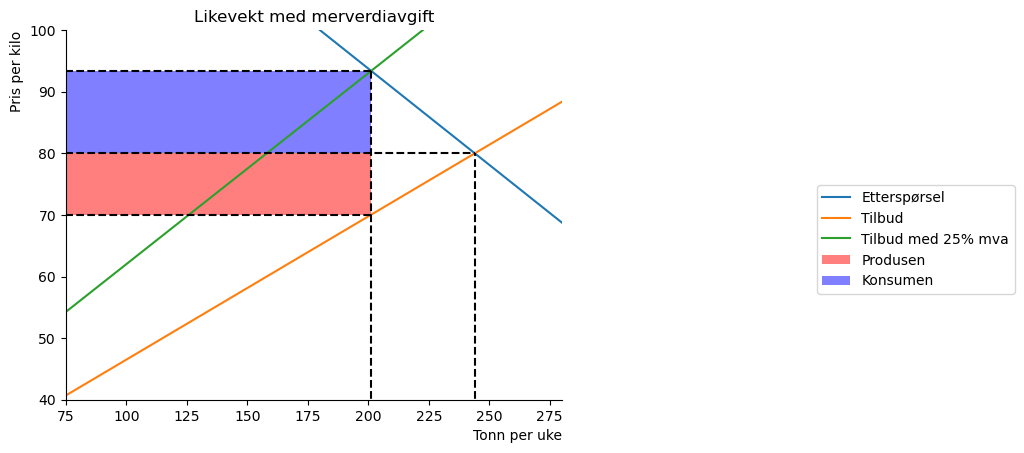

In [9]:
#oppgave 3
pris_t_nt = sp.solve(sp.Eq(x_s(lv_p_ns[0], 0.25), -100 + 4.3*p), p)

#forsettlese fra forgie plott
fig, ax = create_ax()
ax.plot(x_d(p_num),p_num, label='Etterspørsel') #
ax.plot(x_s(p_num, 0),p_num, label='Tilbud') 
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva') 
#lager likevekt for de forskjellgie tilbudene 
ax.plot ([0, x_s(lv_p_s[0], 0)], [lv_p_s[0], lv_p_s[0]], linestyle='dashed', color='black') #likvekt-tilbud
ax.plot ([x_s(lv_p_s[0], 0), x_s(lv_p_s[0], 0)], [0, lv_p_s[0]], linestyle='dashed', color='black')

ax.plot ([0, x_s(lv_p_ns[0], 0.25)], [lv_p_ns[0], lv_p_ns[0]], linestyle='dashed', color='black') #likvekt-tilbud-25%mva
ax.plot ([x_s(lv_p_ns[0], 0.25), x_s(lv_p_ns[0], 0.25)], [0, lv_p_ns[0]], linestyle='dashed', color='black')
##Nye funskjoner til plottet-----------------------------------------------------------------------------------
ax.plot ([0, x_s(pris_t_nt[0], 0)], [pris_t_nt[0], pris_t_nt[0]], linestyle='dashed', color='black')#ny og gammel likevekt
#setter gjennomsiktig farger, lager resultaet mer leslig og lager rektangler
rect1 = patches.Rectangle((75, pris_t_nt[0]), x_s(pris_t_nt[0], 0)-75, lv_p_s[0]-pris_t_nt[0], facecolor='red', alpha=0.5, label="Produsen")
rect2 = patches.Rectangle((75, lv_p_s[0]), x_s(lv_p_ns[0], 0.25)-75, lv_p_ns[0]-lv_p_s[0], facecolor='blue', alpha=0.5, label="Konsumen")

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.legend(bbox_to_anchor=(1.5,0.6)); 
ax.set_title('Likevekt med merverdiavgift')

In [14]:
print("Staten får hele " + str(lv_p_ns[0] - pris_t_nt[0]) + " kr per.kg som blir solgt solgt.") 

Staten får hele 23.3463035019455 kr per.kg som blir solgt solgt.


In [17]:
print("produsent beatler hele "+str(lv_p_s[0]-pris_t_nt[0]) + " kr per.kg solgt samt konsumenten vil da betale " + str(lv_p_ns[0]-lv_p_s[0]) + " kr per.kg solgt.")

produsent beatler hele 9.96108949416345 kr per.kg solgt samt konsumenten vil da betale 13.3852140077821 kr per.kg solgt.


In [ ]:
Fordeler med MVA 
- Vil være enkelere å admistrere av det som sammles inn av produskjonen 
- Vil redusere saktteunndraglese og viser til bedret overholdelse ettersom skattebryden er spredt til flere enheter 
- Vil øke statens inntekter da moms er forbrukerskatt, så det kan stimulere ett forbruk

Ulemper med MVA
- Vil/ Kan være regressivt og ta en større del av inntekter til lavinntekstindevider 
- Vil/ Kan føre til prisøkning til forbrukere ettersom bedrifter får en overveltining av kostnader
- Kan også være komplisert og regne 

Fordleer med stykkprisavgift 
- kan være mindre regrissiv og er lettere og regne 
- kan være hjelpemiddel for en motivering til sparing av ressuser 

Ulemper med stykkprisavgift 
- Vil være vannskelig og administere etter som anntalet varer og tjenester 
- kan føre til redusert getterspørsel og en økning i svaremarked og smugling 